# ✍ SVM(Support Vector Machine)
## 장점 👍
- 분류면이 support vector에만 의존하는 것은 SVM이 compact한 모델이고 메모리를 거의 차지하지 않는 것을 의미한다. 


- 모델이 한번 학습되면, 예측은 매우 빠르다. 


- margin 근처의 점들에만 영향을 받기 때문에, SVM은 고차원에서도 잘 작동한다. 

    (이는 다른 알고리즘들이 어려움을 겪는 영역이다)


- Kernel 방법을 적용한 SVM은 다양한 유형의 데이터에 적용 가능하다. 


## 단점 👎
- $N$개의 샘플을 스케일링하는 것은 $\mathcal{O}[N^3]$에서 $\mathcal{O}[N^2]$의 시간 복잡도를 가진다. 


- 결과가 파라미터 $C$에 크게 의존한다. 따라서 교차 검증을 통해 신중하게 선택해야 하며, 데이터 세트의 크기가 커짐에 따라 비용이 많이 든다. 


- 직접적인 확률론적 해석을 가지고 있지는 않다. [SVC]의 [probability] 파라미터를 통해 추정은 할 수 있지만 비용이 많이 든다.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### 데이터 plot

두 개의 서로 다른 클래스를 2차원 그래프에 그려보자. 

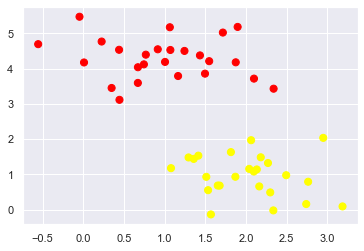

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#### 두가지 클래스를 구분하는 분류 경계면은 다음과 같이 여러 방법이 가능하다. 

(-1.0, 3.5)

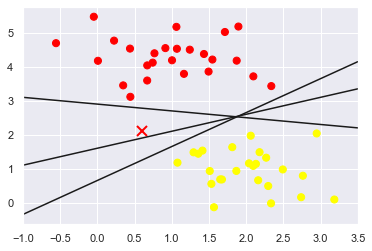

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

----------

## Step1. 어떤 분류 경계면이 가장 좋은 경계면인가❓
### ▶ "마진을 최대화"하는 분류 경계면
(아래 그림에서 회색 부분이 마진을 의미함)

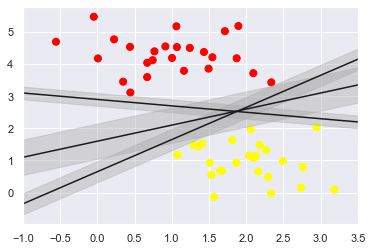

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
#### SVM 학습
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """2D SVM의 결정 경계면 그리기"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) # (30, 30)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

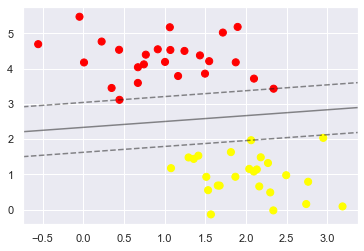

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

분류 경계면을 지나는 점들이 두 클래스 사이의 마진을 최대화하는 결정 경계면(Decision Boundary)이다.

이러한 점들의 속성은 [support_vectors_] attribute에 저장되고 아래와 같다.

In [38]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

경계면 위에 있는 점들만 분류 경계면을 결정하기 때문에, correct side에 있는 어떠한 점들도 분류 경계면에 영향을 끼치지 않는다. 즉 margin을 넘지 않는 한, 데이터의 위치와 수는 중요하지 않다. 

관련하여 아래 예시는 60개의 데이터와 120개의 데이터 포인트를 시각화한 결과이다. 

In [7]:
def plot_svm(N=10, ax=None):
    '''N개의 데이터 포인트로 SVM plot'''
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

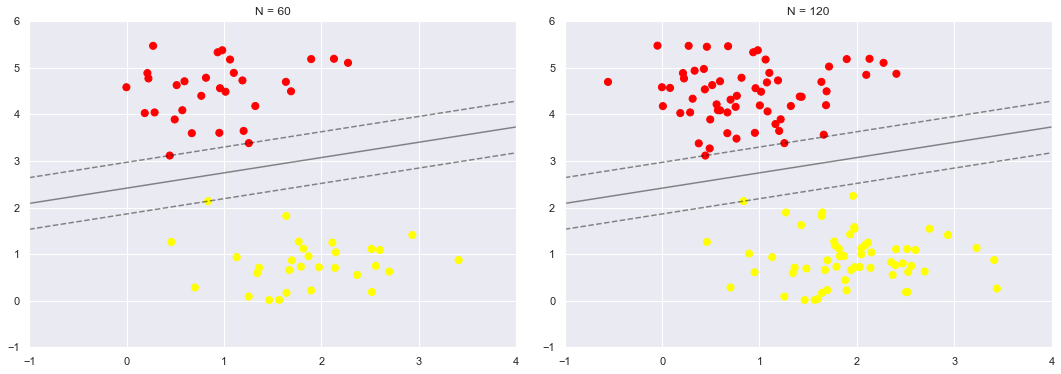

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

이렇게 분류 경계면에서 먼 지점의 데이터들로부터 영향을 받지 않는 것은 SVM 모델의 장점 중 하나이다. 

아래는 IPython의 대화형 위젯을 사용하여 SVM 모델의 기능을 살펴본 것이다. 

In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

----------

## Step2. 모든 sample들이 완벽하게 linearly separable 하지 않다면❓
### ▶오차를 허용하는 "패널티 항" 추가

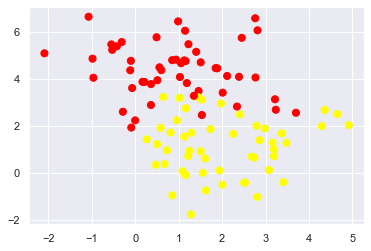

In [10]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

서로 다른 클래스의 데이터에 대해 완벽한 선형 분류가 불가능할 경우, 어느 정도의 잘못 분류된 데이터를 허용하는 Soft-boundary SVM을 사용한다.

Soft-boundary SVM은 매개변수 $C$에 의해 허용 정도가 정해진다. $C$가 클수록 Hard Margin을 가지며 $C$가 작을수록 Soft Margin을 가진다. 

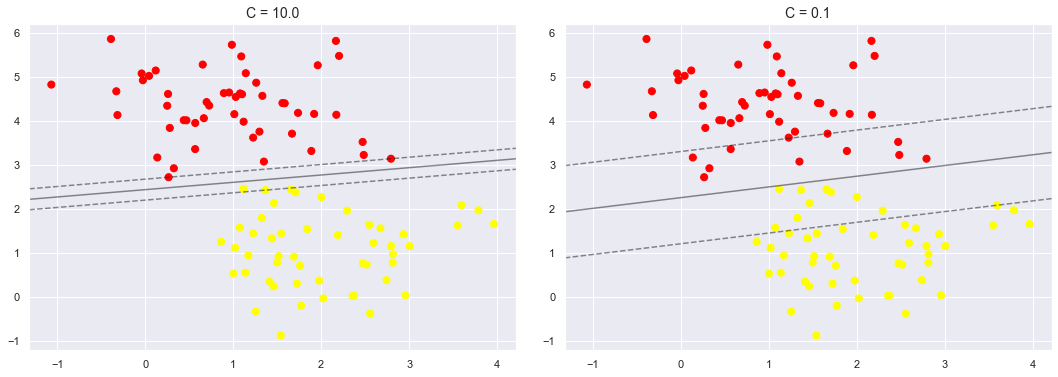

In [11]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

위 그림에서 보면 $C$가 10일 때보다 $C$가 0.1일때 더 넓은 margin을 가짐을 볼 수 있다. 

----------

## Step3. Sample들의 형태가 linearly separable하지 않다면❓
### ▶선형 분류가 가능한 "고차원의 공간으로" 데이터 mapping하기 

###  ✅ 커널 트릭
SVM의 경우 목적 함수와 예측 모형은 아래 식과 같은 dual form으로 표현 가능하다. 


<center>$L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m x_n^T x_m$</center>

<center>$y = w^T x - w_0 = \sum_{n=1}^N a_n y_n x_n^T x - w_0$</center>



이 수식에서 x를 기저함수 변환으로 $\phi(x)$로 바꾸면


<center>$L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m \phi(x_n)^T \phi(x_m)$</center>


<center>$y = w^T x - w_0 = \sum_{n=1}^N a_n y_n \phi(x_n)^T \phi(x) - w_0$</center>


이 된다. 즉 모든 기저함수는 $\phi(x_i)^T\phi(x_j)$ 형태로만 사용된다. 

따라서 두 개의 변환된 독립 변수 벡터를 내적(inner product)한 값 $\phi(x_i)^T\phi(x_j)$를 하나의 함수로 나타낼 수 있다. 

이러한 함수를 커널(kernel)이라고 한다. 

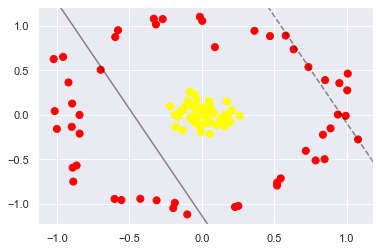

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

위와 같은 데이터 형태는 선형 분류가 불가능하다.

따라서 이러한 비선형 데이터의 경우 kernel 함수를 사용해 데이터를 고차원 공간으로 사영시킨다. 

대표적인 kernel 함수에는 다음과 같은 2가지 함수가 있다. 
1. Polynomial kernel function

2. Gaussian basis kernel function

#### 아래 코드는 Polynomial function을 적용한 예시이다.

In [13]:
### 1. Polynomial function
r = np.exp(-(X ** 2).sum(1))

In [14]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[20, 110], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(20, 110), value=20), IntSlider(value=30, descripti…

위와 같은 식으로 계산하면 N개의 데이터 포인트에 대해 N개의 계산이 필요하다. 

따라서 커널 트릭 식을 사용하면 데이터를 한번에 변환시킬 수 있다. 

#### 아래 코드는 RBF function을 적용한 예시이다.

In [15]:
### 2. Gaussian basis kernel function
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

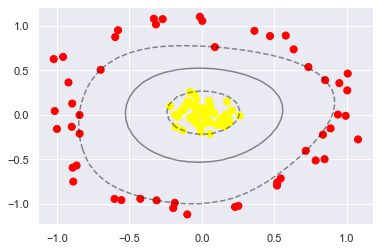

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

출처

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Fitting-a-support-vector-machine

https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html